In [1]:
import numpy as np 
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.shape

(200, 4)

In [6]:
data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.describe

<bound method NDFrame.describe of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [9]:
data.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


<Axes: xlabel='newspaper', ylabel='sales'>

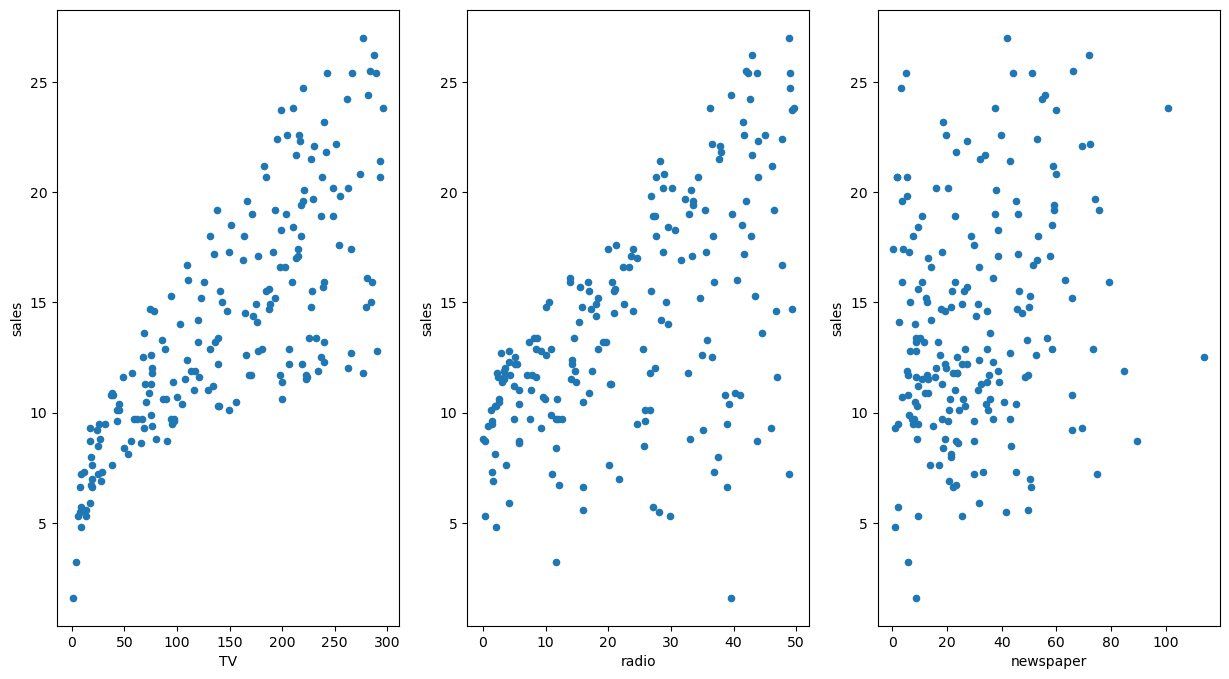

In [10]:
fig, axs = plt.subplots(1,3)   #(rows,cols)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(15,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [11]:
# fig,axs = plt.subplots(1,3)
# df1.plot(ax=axes[0])
# df2.plot(ax=axes[1])
# df3.plot(ax=axes[2])

<Axes: xlabel='newspaper', ylabel='sales'>

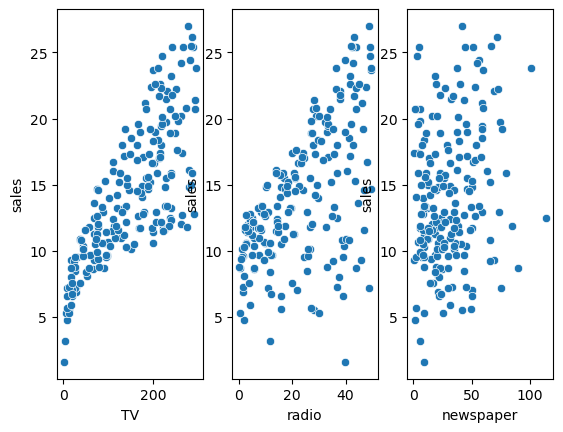

In [12]:
# fig,axs = plt.subplots(1,3)
plt.subplot(1,3,1)
sns.scatterplot(x=data['TV'],y=data['sales'])
plt.subplot(1,3,2)
sns.scatterplot(x=data['radio'],y=data['sales'])
plt.subplot(1,3,3)
sns.scatterplot(x=data['newspaper'],y=data['sales'])

In [13]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

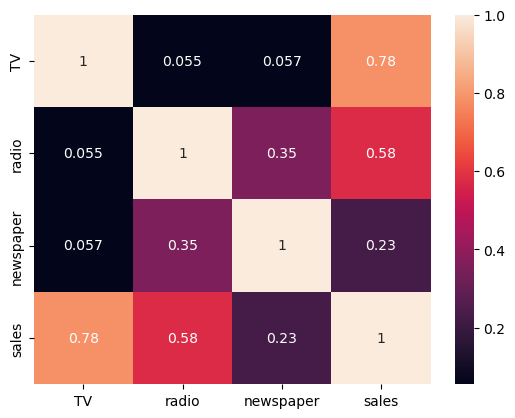

In [14]:
#very important
sns.heatmap(data.corr(),annot=True)

# Linear Regression

In [15]:
feature_cols = ['TV']
x = data[feature_cols]  #features data,Tv
y = data.sales   #target variable

In [16]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 100,test_size=0.20)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [21]:
#x_train

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
my_first_model = LinearRegression()

In [24]:
#training
my_first_model.fit(x_train,y_train)

LinearRegression()

In [25]:
my_first_model.coef_   #return val of M or regression coeff

array([0.04610976])

In [26]:
my_first_model.intercept_    #c inntercept

7.113008222196275

# Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in sales

# Infernce

y=mx+c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on  TV i $50,000. I want you to tell me the sales generated due to this spend

In [27]:
0.046*50  +7.11

9.41

In [28]:
0.046*7.8 +7.11

7.4688

In [29]:
pred = my_first_model.predict(x_test)

In [30]:
pred

array([ 7.47266432, 18.09635222, 13.3470473 , 17.15110221, 18.25773636,
       16.64850586, 13.53148632, 16.2242961 , 17.09115952, 17.10960343,
       12.51707168, 17.69519733,  9.70437654, 15.77242049, 11.13377899,
       11.45654728, 14.01563877, 14.96088877, 14.65195341, 12.31879973,
       17.01277294, 13.07961071, 16.12285464, 15.27443512, 15.6387022 ,
       17.27098757, 17.2479327 , 10.58507289, 15.6387022 , 12.78911924,
       10.26691557, 10.29458142, 12.69228876, 15.80008634,  9.41849605,
       12.66923388, 11.59487655, 14.87789121, 17.36781806, 16.02141317])

In [31]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    12.2
116    12.2
96     11.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    15.6
125    10.6
196     9.7
194    17.3
177    11.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     15.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65      9.3
151    11.6
162    14.9
170     8.4
77     14.2
32      9.6
173    11.7
174    11.5
85     15.2
Name: sales, dtype: float64

To complete the supervised learning flow follow the bolow steps after fitting the model

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Evaluation on Train Data

In [33]:
my_linear_preds_train = my_first_model.predict(x_train)

print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMAE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(x_train,y_train))

MAE on Train Data : 2.5730879118548264
MSE on Train Data : 10.75864378390027
RMAE on Train Data : 3.2800371619693993
R-squared on Train Data : 0.6197569503198974


# Evaluation on Test Data

In [34]:
my_model_preds = my_first_model.predict(x_test)

print('MAE on Test Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_model_preds,y_test))
print('RMAE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Trrain Data :', my_first_model.score(x_test,y_test))

MAE on Test Data : 2.4983195821565407
MSE on Test Data : 9.687069547890871
RMAE on Train Data : 3.1124057492381794
R-squared on Trrain Data : 0.5441581483697225


# Multiple linear regression

In [35]:
# feaures = data[['TV','radio','newspaper']]
# target = data[['sales']]
features_cols = ['TV', 'radio' , 'newspaper']
x = data[features_cols]   #independent var  or features
y = data.sales

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 10,train_size=0.80)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [38]:
my_multiple_linear_model = LinearRegression()

In [39]:
my_multiple_linear_model.fit(x_train,y_train)

LinearRegression()

In [40]:
my_multiple_linear_model.coef_

array([ 0.0437726 ,  0.19343299, -0.00222879])

In [41]:
my_multiple_linear_model.intercept_

3.2540971144188813

In [42]:
pred=my_multiple_linear_model.predict(x_test)

In [43]:
pred

array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [44]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: sales, dtype: float64

# Evaluation on Train Data

In [45]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(x_train)

print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMAE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(x_train,y_train))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492503
RMAE on Train Data : 1.3633035872281898
R-squared on Train Data : 0.9209087553499528


# Evaluation on test data

In [46]:
my_multiple_linear_preds = my_multiple_linear_model.predict(x_test)

print('MAE on Test Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMAE on Test Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Test Data :', my_multiple_linear_model.score(x_test,y_test))

MAE on Test Data : 1.885013031042315
MSE on Test Data : 6.700486756528875
RMAE on Test Data : 2.58852984462781
R-squared on Test Data : 0.8353672324670594


In [47]:
data1=pd.read_csv('New_data.csv')

In [48]:
data1

,TV,radio,newspaper
0,300,50,80


In [49]:
my_multiple_LR_predict=my_multiple_linear_model.predict(data1)

In [50]:
my_multiple_LR_predict

array([25.87922391])